In [1]:
import os
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white', font_scale=1.5)

In [2]:
from mks import get_mks
from impres import get_impres
from ifng import get_ifng
from tide import get_tide

import sys,os
sys.path.insert(0, '/home/was966/Research/PSOG/itrp/')
from score import Xy_score

In [3]:
data_path = '/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/18425/'
itrp_tpm = pd.read_pickle(os.path.join(data_path, 'TPM.ITRP.TABLE'))
tcga_tpm = pd.read_pickle(os.path.join(data_path, 'TPM.TCGA.TABLE'))
itrp_patient = pd.read_pickle(os.path.join(data_path, 'PATIENT.ITRP.TABLE'))
dfp1 = itrp_tpm.join(itrp_patient.cohort)
#itrp_patient

In [4]:
df_tpm_control = np.log2(tcga_tpm + 1).median()

In [5]:
cohorts = ['Riaz', 'Hugo', 'Allen',  'MGH', 'Gide', 'Liu']

prcs = []
rocs = []
for cohort in cohorts:
    dfc = dfp1[dfp1.cohort == cohort]
    df_tpm = dfc[dfc.columns[:-1]]
    y_col = 'response_label'
    dfy = df_tpm.join(itrp_patient[y_col])[y_col]
    tmb = itrp_patient['tmb.wang']
    tmb.name = 'TMB'
    
    dfs1 = get_mks(df_tpm)
    dfs2 = get_impres(df_tpm)
    dfs3 = get_ifng(df_tpm)
    dfs4 = get_tide(df_tpm, df_tpm_control)
    
    dfs = dfs1.join(dfs2).join(dfs3).join(dfs4[['TIDE', 'IFNG', 'MSI Score','CTL']]).join(tmb)
    
    dfxy = dfs.join(dfy) #.dropna()
    
    prc = Xy_score(dfxy, y_col, method='prc').prc
    roc = Xy_score(dfxy, y_col, method='roc').roc

    prc.name = cohort
    roc.name = cohort
    prcs.append(prc)
    rocs.append(roc)

/home/was966/Research/PSOG/itrp/model/ifng.py:43: UserWarning: Markers of [] are missed and not used.
  warnings.warn('Markers of %s are missed and not used.' % markers_unused)


[WARN] 4.66 % Genes are missing after converting to Entrez ID
[WARN] The majority(>80%) of genes with positive expression in your inputted data. Please Normalize your data
[WARN] Start normalizing the input expression profile by: 1. Do the log2(x+1) transformation. 2. Subtract the average across your samples.


100%|##########| 21/21 [00:00<00:00, 1609.71it/s]
/home/was966/Research/PSOG/itrp/model/ifng.py:43: UserWarning: Markers of [] are missed and not used.
  warnings.warn('Markers of %s are missed and not used.' % markers_unused)


[WARN] 4.66 % Genes are missing after converting to Entrez ID
[WARN] The majority(>80%) of genes with positive expression in your inputted data. Please Normalize your data
[WARN] Start normalizing the input expression profile by: 1. Do the log2(x+1) transformation. 2. Subtract the average across your samples.


100%|##########| 21/21 [00:00<00:00, 2855.86it/s]
/home/was966/Research/PSOG/itrp/model/ifng.py:43: UserWarning: Markers of [] are missed and not used.
  warnings.warn('Markers of %s are missed and not used.' % markers_unused)


[WARN] 4.66 % Genes are missing after converting to Entrez ID
[WARN] The majority(>80%) of genes with positive expression in your inputted data. Please Normalize your data
[WARN] Start normalizing the input expression profile by: 1. Do the log2(x+1) transformation. 2. Subtract the average across your samples.


100%|##########| 21/21 [00:00<00:00, 4896.07it/s]
/home/was966/Research/PSOG/itrp/model/ifng.py:43: UserWarning: Markers of [] are missed and not used.
  warnings.warn('Markers of %s are missed and not used.' % markers_unused)


[WARN] 4.66 % Genes are missing after converting to Entrez ID
[WARN] The majority(>80%) of genes with positive expression in your inputted data. Please Normalize your data
[WARN] Start normalizing the input expression profile by: 1. Do the log2(x+1) transformation. 2. Subtract the average across your samples.


100%|##########| 21/21 [00:00<00:00, 3545.77it/s]
/home/was966/Research/PSOG/itrp/model/ifng.py:43: UserWarning: Markers of [] are missed and not used.
  warnings.warn('Markers of %s are missed and not used.' % markers_unused)


[WARN] 4.66 % Genes are missing after converting to Entrez ID
[WARN] The majority(>80%) of genes with positive expression in your inputted data. Please Normalize your data
[WARN] Start normalizing the input expression profile by: 1. Do the log2(x+1) transformation. 2. Subtract the average across your samples.


100%|##########| 21/21 [00:00<00:00, 1791.34it/s]
/home/was966/Research/PSOG/itrp/model/ifng.py:43: UserWarning: Markers of [] are missed and not used.
  warnings.warn('Markers of %s are missed and not used.' % markers_unused)


[WARN] 4.66 % Genes are missing after converting to Entrez ID
[WARN] The majority(>80%) of genes with positive expression in your inputted data. Please Normalize your data
[WARN] Start normalizing the input expression profile by: 1. Do the log2(x+1) transformation. 2. Subtract the average across your samples.


100%|##########| 21/21 [00:00<00:00, 528.45it/s]


Text(-27.875000000000014, 0.5, '')

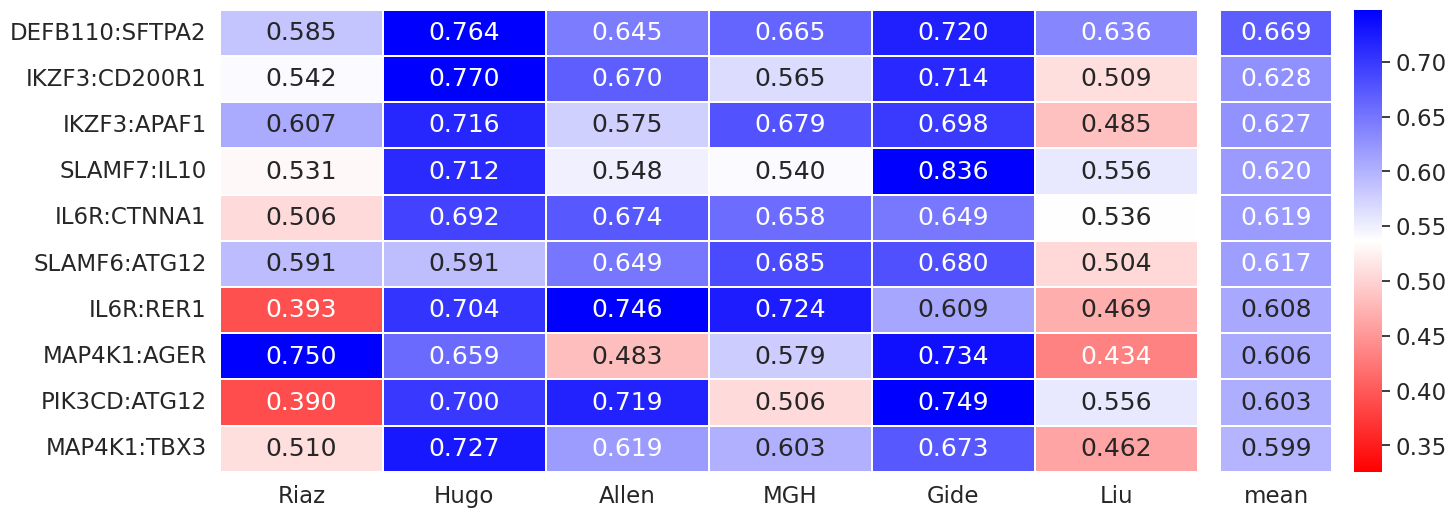

In [6]:
s = pd.concat(prcs, axis=1)

s1 = pd.concat(prcs, axis=1).iloc[:10]
s2 = pd.concat(prcs, axis=1).iloc[10:]

s1 = s1.loc[s1.apply(lambda x:np.nanmean(x), axis=1).sort_values(ascending=False).index]
s2 = s2.loc[s2.apply(lambda x:np.nanmean(x), axis=1).sort_values(ascending=False).index]

fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize=(15, 6),  gridspec_kw={'width_ratios': [7, 0.8, 0.2]}, sharey=False, )

vmin = s.min().mean()
vmax = s.max().mean()

sns.heatmap(s1, cmap = 'bwr_r', ax=ax1, annot=True,  vmin = vmin, linewidths=.1, cbar_ax = ax3, fmt='.3f',
            vmax = vmax, annot_kws={"fontsize":18}, cbar=True)

sns.heatmap(s1.mean(axis=1).to_frame(name='mean'), cmap = 'bwr_r', ax=ax2, annot=True, linewidths=.1,fmt='.3f',
            vmin = vmin, vmax = vmax, annot_kws={"fontsize":18}, cbar=False)

ax2.set_yticklabels([])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.06, hspace=None)

ax2.set_ylabel('')
ax1.set_ylabel('')



Text(56.249999999999986, 0.5, '')

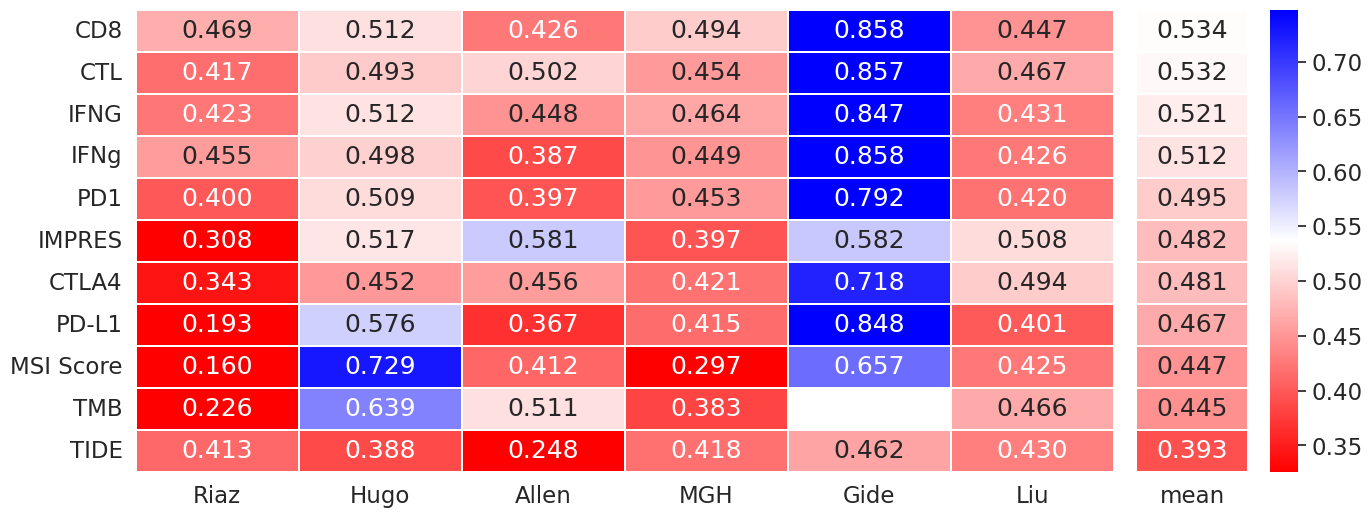

In [7]:
fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize=(15, 6),  gridspec_kw={'width_ratios': [7, 0.8, 0.2]}, sharey=False, )

sns.heatmap(s2, cmap = 'bwr_r', ax=ax1, annot=True,  vmin = vmin, linewidths=.1, cbar_ax = ax3, fmt='.3f',
            vmax = vmax, annot_kws={"fontsize":18}, cbar=True)

sns.heatmap(s2.mean(axis=1).to_frame(name='mean'), cmap = 'bwr_r', ax=ax2, annot=True, linewidths=.1,fmt='.3f',
            vmin = vmin, vmax = vmax, annot_kws={"fontsize":18}, cbar=False)

ax2.set_yticklabels([])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.06, hspace=None)

ax2.set_ylabel('')
ax1.set_ylabel('')


Text(-27.875000000000014, 0.5, '')

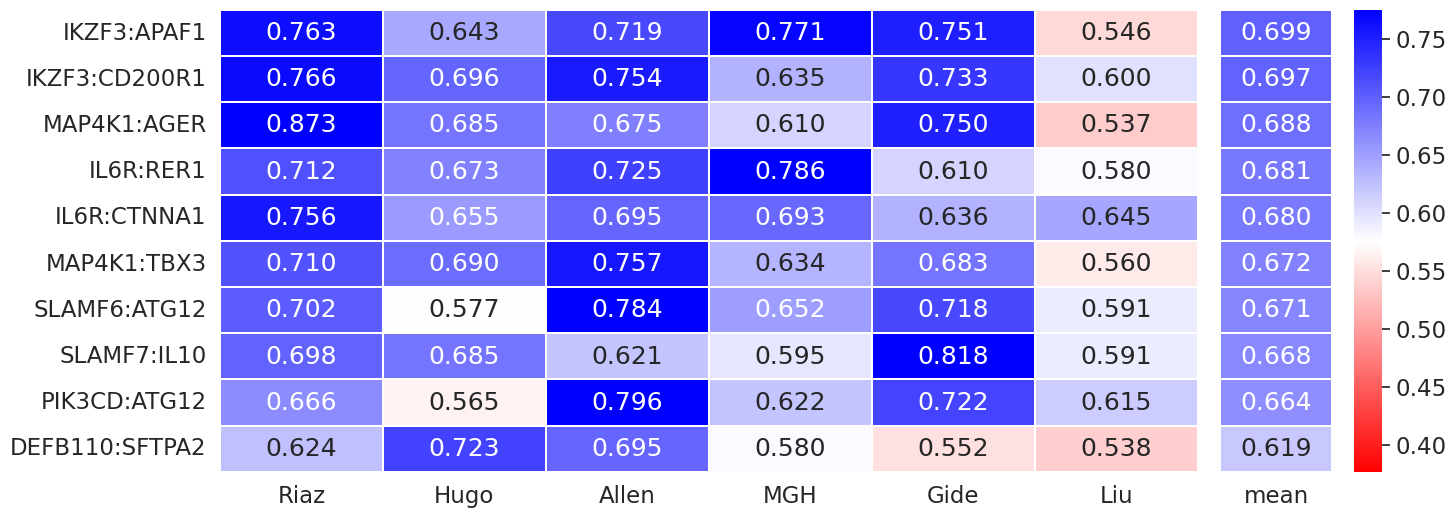

In [9]:
s = pd.concat(rocs, axis=1)

s1 = pd.concat(rocs, axis=1).iloc[:10]
s2 = pd.concat(rocs, axis=1).iloc[10:]

s1 = s1.loc[s1.apply(lambda x:np.nanmean(x), axis=1).sort_values(ascending=False).index]
s2 = s2.loc[s2.apply(lambda x:np.nanmean(x), axis=1).sort_values(ascending=False).index]

fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize=(15, 6),  gridspec_kw={'width_ratios': [7, 0.8, 0.2]}, sharey=False, )

vmin = s.min().mean()
vmax = s.max().mean()

sns.heatmap(s1, cmap = 'bwr_r', ax=ax1, annot=True,  vmin = vmin, linewidths=.1, cbar_ax = ax3, fmt='.3f',
            vmax = vmax, annot_kws={"fontsize":18}, cbar=True)

sns.heatmap(s1.mean(axis=1).to_frame(name='mean'), cmap = 'bwr_r', ax=ax2, annot=True, linewidths=.1,fmt='.3f',
            vmin = vmin, vmax = vmax, annot_kws={"fontsize":18}, cbar=False)

ax2.set_yticklabels([])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.06, hspace=None)

ax2.set_ylabel('')
ax1.set_ylabel('')

Text(56.249999999999986, 0.5, '')

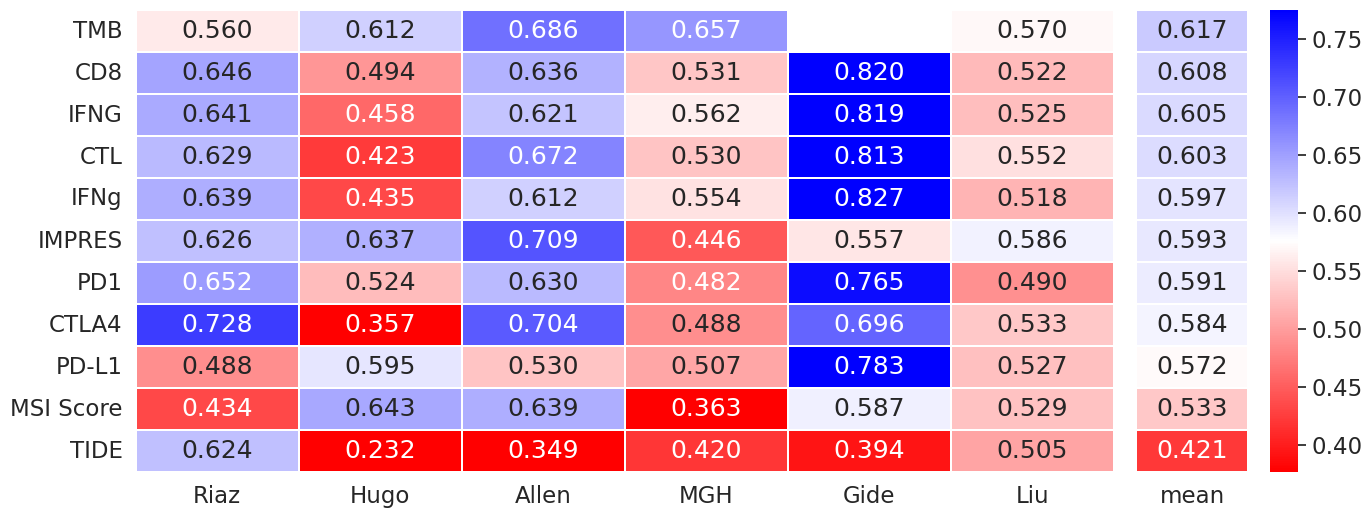

In [10]:


fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize=(15, 6),  gridspec_kw={'width_ratios': [7, 0.8, 0.2]}, sharey=False, )

sns.heatmap(s2, cmap = 'bwr_r', ax=ax1, annot=True,  vmin = vmin, linewidths=.1, cbar_ax = ax3, fmt='.3f',
            vmax = vmax, annot_kws={"fontsize":18}, cbar=True)

sns.heatmap(s2.mean(axis=1).to_frame(name='mean'), cmap = 'bwr_r', ax=ax2, annot=True, linewidths=.1,fmt='.3f',
            vmin = vmin, vmax = vmax, annot_kws={"fontsize":18}, cbar=False)

ax2.set_yticklabels([])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.06, hspace=None)

ax2.set_ylabel('')
ax1.set_ylabel('')


Text(56.249999999999986, 0.5, '')

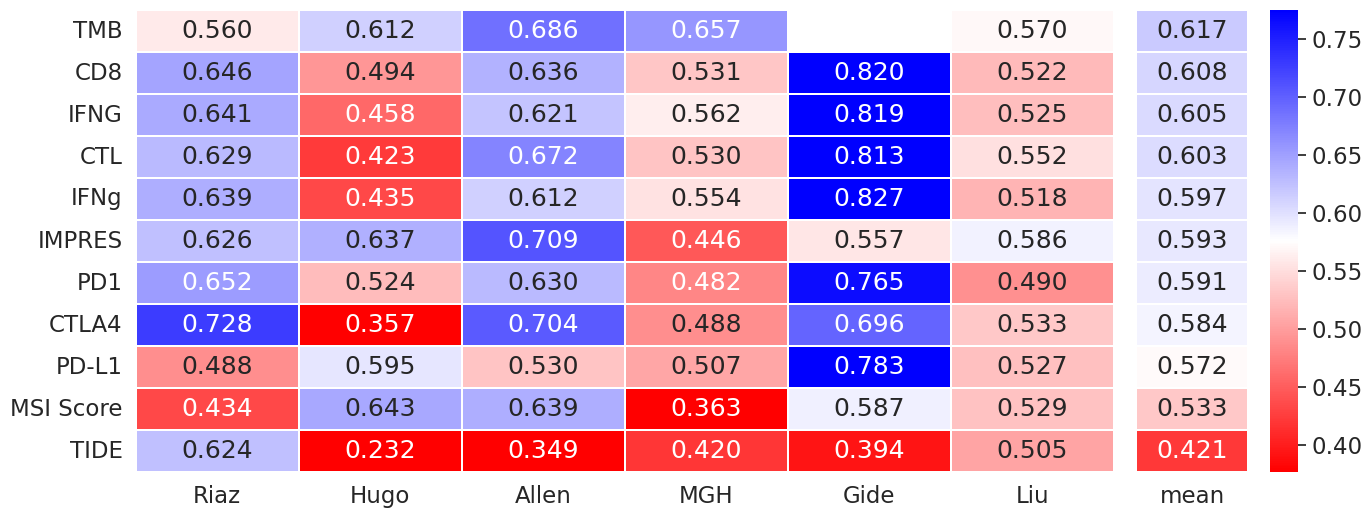

In [11]:


fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize=(15, 6),  gridspec_kw={'width_ratios': [7, 0.8, 0.2]}, sharey=False, )

sns.heatmap(s2, cmap = 'bwr_r', ax=ax1, annot=True,  vmin = vmin, linewidths=.1, cbar_ax = ax3, fmt='.3f',
            vmax = vmax, annot_kws={"fontsize":18}, cbar=True)

sns.heatmap(s2.mean(axis=1).to_frame(name='mean'), cmap = 'bwr_r', ax=ax2, annot=True, linewidths=.1,fmt='.3f',
            vmin = vmin, vmax = vmax, annot_kws={"fontsize":18}, cbar=False)

ax2.set_yticklabels([])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.06, hspace=None)

ax2.set_ylabel('')
ax1.set_ylabel('')


In [12]:
s1.round(3)

,Riaz,Hugo,Allen,MGH,Gide,Liu
gene_name,,,,,,
IKZF3:APAF1,0.763,0.643,0.719,0.771,0.751,0.546
IKZF3:CD200R1,0.766,0.696,0.754,0.635,0.733,0.600
MAP4K1:AGER,0.873,0.685,0.675,0.610,0.750,0.537
IL6R:RER1,0.712,0.673,0.725,0.786,0.610,0.580
IL6R:CTNNA1,0.756,0.655,0.695,0.693,0.636,0.645
MAP4K1:TBX3,0.710,0.690,0.757,0.634,0.683,0.560
SLAMF6:ATG12,0.702,0.577,0.784,0.652,0.718,0.591
SLAMF7:IL10,0.698,0.685,0.621,0.595,0.818,0.591
PIK3CD:ATG12,0.666,0.565,0.796,0.622,0.722,0.615


In [13]:
from tidepy.pred import TIDE


In [14]:
TIDE()

TypeError: TIDE() missing 2 required positional arguments: 'expression' and 'cancer'